In [15]:
import numpy as np
from unconstrained.newton_raphson import NewtonRaphson

Minima: [x, y] = [1. 1.]
Iteration count: 76


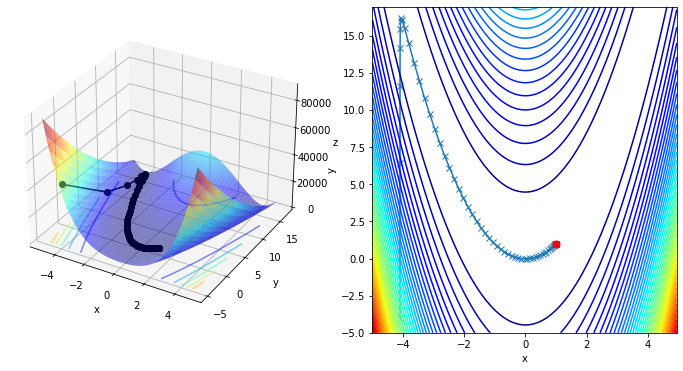

In [16]:
NR = NewtonRaphson()
Ros_func = lambda x, y: 100*(y - x**2)**2 + (1 - x)**2
init = np.array([-4.1, -4.])
NR.optimize(Ros_func, init)
with np.printoptions(precision=5, suppress=True):
    print(f'Minima: [x, y] = {NR.points_[-1]}')
print(f'Iteration count: {NR.num_steps_}')
NR.plot(Ros_func, NR.points_, x_min=-5, x_max=5, y_min=-5, y_max=17)